# Introduction to Data Science - Homework 3
*COMP 5369 / MATH 4100, University of Utah, http://datasciencecourse.net/*

Due: Friday, February 2, 11:59pm.

In this homework you will read in and analyze a movies dataset. First we'll do some basic analysis with vanilla Python, then we'll move on to doing more advanced analysis with [Pandas](http://pandas.pydata.org/pandas-docs/stable). 

## Your Data

*First Name:*  Rebecca <br>
*Last Name:*   Rodriguez <br>



## Part 1: Analyzing Data The Hard Way

In this part we'll do some manual analysis of a movies dataset.

### Task 1.1: Read in the data

Parse the file [movies.csv](movies.csv) using the [csv library](https://docs.python.org/3/library/csv.html). Lecture 6 and/or Homework 2 might be a good inspiration for this. 

We recommend that you store the header in a separate array. Make sure that at least the "ratings" and the "votes" columns are cast to the appropriate data types for doing calculations with them. 

Print the header, a row of the table, and the number of rows and columns.

In [2]:
# import the csv library
import csv

# initialize the top-level array
movies = []
header = []

#open the csv file and read into movies array
with open('movies.csv') as csvfile:
    filereader = csv.reader(csvfile, delimiter=',', quotechar='"')
    for row in filereader:
        movies.append(row)

#remove the header of movies table
header = movies.pop(0)

#cast "ratings" and "votes" columns to float and int
for row in movies:
    row[5] = float(row[5])
    row[6] = float(row[6])

#print header, one row and size of movies table
print("Header: ", header, '\n')
print("One row from movies table:", movies[600], '\n') #what are these movies???
print("Number of rows in movies table: ", len(movies))
print("Number of columns in movies table: ", len(header))

Header:  ['', 'title', 'year', 'length', 'budget', 'rating', 'votes', 'r1', 'r2', 'r3', 'r4', 'r5', 'r6', 'r7', 'r8', 'r9', 'r10', 'mpaa', 'Action', 'Animation', 'Comedy', 'Drama', 'Documentary', 'Romance', 'Short'] 

One row from movies table: ['601', 'A futura memoria: Pier Paolo Pasolini', '1986', '115', 'NA', 6.6, 7.0, '14.5', '0', '0', '0', '0', '0', '24.5', '14.5', '24.5', '14.5', '', '0', '0', '0', '0', '1', '0', '0'] 

Number of rows in movies table:  58788
Number of columns in movies table:  25


### Task 1.2:  Calculate movie stats

In this task, you will calculate some statistics about movies. We suggest you implement your solutions for Tasks 1.2.1-1.2.3 in one code cell - you should be able to calculate this in a single iteration over the dataset.

#### Task 1.2.1 Calcualte average ratings
Compute the average rating for the movies and print the output. Also print the number of movies.
Your output could look like this:
    
    Average rating: xxx.xxxx, Number of movies: xx

#### Task 1.2.2: Calculate average rating for major movies

Compute the average rating for the movies that have more than 500 votes in your loaded dataset and print the output. (We'll call these movies with more than 500 votes *major movies* from now on).

Your output could look like this:
    
    Average rating of movies with more than 500 votes: xxx.xxxx, Number of major movies: xx

#### Task 1.2.3: Find the highest rated major movie

Find out which of the movies with more than 500 votes has the highest rating.

Your output could look like this:
    
    Highest rating: xxx.xxxx, Title: MOVIE TITLE
 
#### Task 1.2.4: Interpret the data
 * What's the size relationship of major movies to all movies?
 * Are major movies usually better than the average movies?

In [3]:
# Tasks 1.2.1 - 1.2.3

#initialize variables to use in calculations below
ratings_total = 0.0
mm_count = 0.0    #mm = major movie
mm_ratings_total = 0.0
mm_highest_rating = 0.0
mm_highest_rating_title = ''

high_count = 0.0

#iterate over the movies table
for item in movies:
    #Task 1.2.1
    #sum rating for all movies
    ratings_total += item[5]   #rating is in column 6
    
    #Task 1.2.2
    #determine if mm (more than 500 votes)
    if item[6] > 500.0:                 #votes are in column 7
        mm_count += 1                   #count the number of mm
        mm_ratings_total += item[5]     #sum ratings for mm
    
        #Task 1.2.3
        #determine the highest rated mm and title
        if item[5] > mm_highest_rating:
            mm_highest_rating = item[5]
            mm_highest_rating_title = item[1]
            high_count += 1

#calculate averages
ratings_avg = round((ratings_total / len(movies)), 2)
mm_avg = round((mm_ratings_total / mm_count), 2)

#return values
#Task 1.2.1
print("Average rating: ", ratings_avg, " Number of movies: ", len(movies))
#Task 1.2.2
print("Average rating of Major Movies: ", mm_avg, " Number of Major Movies: ", int(mm_count))
#Task 1.2.3
print("Highest rating for Major Movie: ", mm_highest_rating, " Title: ", mm_highest_rating_title, "\n")

#debugging
#print("high count: ", high_count)

#calculations
print("Percentage of movies that are Major Movies: ", round((int(mm_count) / len(movies)) * 100, 2), "%")
    
    

Average rating:  5.93  Number of movies:  58788
Average rating of Major Movies:  6.37  Number of Major Movies:  6458
Highest rating for Major Movie:  9.1  Title:  Godfather, The 

Percentage of movies that are Major Movies:  10.99 %


**Your Interpretation**: Major movies make up about 11% of total movies. On average, the rating for major movies is higher than for non-major movies. Is this difference in average rating significant? A hypothesis test for the difference in population means could be performed to determine whether the difference between 5.93 and 6.37 is significant. As for now, we can only notice there is a 0.44 difference in ratings between the two. 

## Part 2: Pandas

In this part we will use the [Pandas library](http://pandas.pydata.org/pandas-docs/stable) for our analysis.

### Task 2.1: Loading data

Read in the data again. This time you should create a [Pandas DataFrame](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html). Print the head of the dataset. 
 * How many data rows did you load? How many columns?
 * Of which data types are the columns? 
 * Do you have to do manual data type conversions?

In [4]:
# import pandas and numpy
import pandas as pd

movies_df = pd.read_csv("movies.csv")

#determine size of df (rows and columns)
print("Size:", movies_df.shape)


Size: (58788, 25)


In [5]:
# print data types
print(movies_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58788 entries, 0 to 58787
Data columns (total 25 columns):
Unnamed: 0     58788 non-null int64
title          58788 non-null object
year           58788 non-null int64
length         58788 non-null int64
budget         5215 non-null float64
rating         58788 non-null float64
votes          58788 non-null int64
r1             58788 non-null float64
r2             58788 non-null float64
r3             58788 non-null float64
r4             58788 non-null float64
r5             58788 non-null float64
r6             58788 non-null float64
r7             58788 non-null float64
r8             58788 non-null float64
r9             58788 non-null float64
r10            58788 non-null float64
mpaa           4924 non-null object
Action         58788 non-null int64
Animation      58788 non-null int64
Comedy         58788 non-null int64
Drama          58788 non-null int64
Documentary    58788 non-null int64
Romance        58788 non-null int64
Sho

**Your Interpretation**: Loading the movies.csv file into a Pandas dataframe yielded 58788 rows and 25 columns. Each column's data type was automatically assigned the appropriate type (e.g. int64, object, float64) and is provided in the output above. Consequently, there was no need to manually convert any columns to different data types, as was the case in Task 1.1.


### Task 2.2: Calculate the average rating

Compute the average rating for all movies and print the output in a formatted way.

Your output could look like this:
    
    Average rating: xxx.xxxx

In [6]:
#calculate average rating for all movies
avg_rating = round(movies_df["rating"].mean(), 2)
print("Average rating: ", avg_rating)

Average rating:  5.93


### Task 2.3: Compare the runtime

Measure the runtime of the mean calculation using [Pandas](http://pandas.pydata.org/pandas-docs/stable) and compare it to the computation time for calculating the mean using a for loop (you can copy the relevant parts from part one).

You can use [time.clock()](https://docs.python.org/3/library/time.html) to set timestamps before and after the execution of the code you want to measure, then you simply substract end time from start time.

Print your results in a human readable way and add a metric to the output. Calculate the factor of the difference and print it. Note that the exact times and the factors will vary when you re-run this and especially between machines. 

E.g.:  
    time using own code: xxx.xxx s  
    time using Pandas: xxx.xxx s  
    difference factor: xxx

In [7]:
import time

#time how long it takes to calculate mean of ratings (the hard way)
start1 = time.clock()
rat_total = 0.0
for item in movies:
    rat_total += item[5]   #rating is in column 6
round((ratings_total / len(movies)), 2)
end1 = time.clock()

hard_mean_time = end1 - start1

#time how long it takes to calculate mean of ratings (panda)
start2 = time.clock()
round(movies_df["rating"].mean(), 2)
end2 = time.clock()

pandas_mean_time = end2 - start2

#calculate difference between two times
diff_mean_time = hard_mean_time - pandas_mean_time

print("Time using code from Task 1.2.1: ", hard_mean_time, "s")
print("Time using code from Task 2.2 (Pandas): ", pandas_mean_time, "s")
print("Difference factor: ", diff_mean_time, "s")


Time using code from Task 1.2.1:  0.009630898240977714 s
Time using code from Task 2.2 (Pandas):  0.0004023921163644438 s
Difference factor:  0.00922850612461327 s


### Task 2.4: Filter out rows

The whole movies dataset has about 60k entries. Use pandas to filter your dataframe to contain only the major movies with more than 500 votes.

Count and print the number of movies with more than 500 votes. 

E.g.:
    xxx.xxx movies have more than 500 votes.

In [8]:
#count number of major movies (i.e. movies with more than 500 votes)
major_movies = movies_df[movies_df["votes"] > 500]
print("Number of major movies (i.e. movies with more than 500 votes): ", major_movies.shape[0])

Number of major movies (i.e. movies with more than 500 votes):  6458


### Task 2.5: Calculate the average rating for major movies

Compute the average rating for the major movies.
Your output could look like this:
    
    Average rating of movies with more than 500 votes: xxx.xxxx

In [9]:
#calculate average rating for major movies
avg_major_rating = round(major_movies["rating"].mean(), 2)

print("Average rating of major movies: ", avg_major_rating)

Average rating of major movies:  6.37


### Task 2.6: Find the highest rated major movie

Find the highest rated major movie in the dataframe. Hint: [idxmax()](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.idxmax.html) could be a helpful function. 

Print the title and the rating.

Your output could look like this:
    
    Highest rated movie: TITLE, rating: x.x


In [10]:
#determine title of highest rated major movie

#find highest rating
max_mm_rating = major_movies["rating"].max()
#find movie with highest rating
max_mm = major_movies[major_movies["rating"] == max_mm_rating]
#retrieve title with highest rating
mmm_title = max_mm[["title", "rating"]]

print("Highest rated movies: ", mmm_title.iloc[0][0], " and ", mmm_title.iloc[1][0])
print("Rating: ", mmm_title.iloc[1][1])


Highest rated movies:  Godfather, The  and  Shawshank Redemption, The
Rating:  9.1


### Task 2.7: Filter out rows and count specific features

From the major movies you filtered out in a previous task, find out 
 * How many are comedies.
 * How many are dramas
 * How many are both, comedies and dramas
 
Create new dataframed for each of these subsets.

Hint: you can combine broadcasting statements with a boolean AND: `&`.

Print the results, e.g.:  

    xxx.xxx major movies are comedies.
    xxx.xxx major movies are dramas.
    xxx.xxx major movies are both, comedies and dramas.

In [11]:
#determine the number of comedies
comedies = movies_df[movies_df["Comedy"]==1]
dramas = movies_df[movies_df["Drama"]==1]

com_dram = movies_df[(movies_df.Comedy==1) & (movies_df.Drama==1)]

print(comedies.shape[0], " movies are comedies")
print(dramas.shape[0], " movies are dramas")
print(com_dram.shape[0], " movies are both comedies and dramas")


17271  movies are comedies
21811  movies are dramas
3099  movies are both comedies and dramas


### Task 2.8: Compare ratings of different categories

Now we want to compare the ratings for comedies and dramas for major movies.

Compute the average rating, maximum rating, minimum rating, standard deviation, and the median for each category. Hint: there is a function that does all of this in one line. 

What do these numbers tell us? Provide an interpretation.

In [12]:
import numpy as np

#create new dfs of major comedies and major dramas
major_comedies = major_movies[major_movies.Comedy == 1]
major_dramas = major_movies[major_movies.Drama == 1]

#print statistics for new dfs
print("Stats for major comedies: ", major_comedies.rating.describe())
print("Stats for major dramas: ", major_dramas.rating.describe())

Stats for major comedies:  count    2553.000000
mean        6.121387
std         1.196146
min         1.700000
25%         5.300000
50%         6.200000
75%         7.100000
max         8.700000
Name: rating, dtype: float64
Stats for major dramas:  count    3370.000000
mean        6.749614
std         0.990969
min         1.300000
25%         6.200000
50%         6.900000
75%         7.500000
max         9.100000
Name: rating, dtype: float64


**Your Interpretation**: The above stats are provided for the categories 'Major Comedies' and 'Major Dramas'. The maximum rating tells us the highest rated movie in each category; the max ratings are 8.7 and 9.1, respectively. The minimum rating tells us the lowest rated movie in each category; the min ratings are 1.7 and 1.3, respectively. The mean rating tells us the average rating for all movies in each category (i.e. where the data is centered); the mean ratings are 6.12 and 6.75. We can see that 'Major Dramas' have a higher average than 'Major Comedies'. While the mean indicates where the ratings are centered, the standard deviation tells us about how far most ratings are from the center. With standard deviations of 1.196 and 0.991, respectively, we know that ratings for dramas deviate less from their average of 6.75. In other words, we can conclude that 'Major Dramas' are overall generally rated higher than 'Major Comedies'. 

### Task 2.9: Movies per year

Calcluate how many major movies were made in each year.

Print the number like this, sorted by year:

    year   number of movies
    1902    xxx
    1903    xxx
    ...     ...

Use this data to render a line chart of the number of movies per year.

In [13]:
#categorize major movies by year
mm_by_year = major_movies.groupby('year')

#total major movies per year
mm_year_df = mm_by_year.size().to_frame('number of movies').reset_index()
print(mm_year_df)


    year  number of movies
0   1902                 1
1   1903                 1
2   1915                 1
3   1916                 1
4   1917                 1
5   1919                 1
6   1920                 1
7   1921                 1
8   1922                 3
9   1923                 2
10  1924                 4
11  1925                 5
12  1926                 1
13  1927                 8
14  1928                 5
15  1929                 4
16  1930                 5
17  1931                 7
18  1932                14
19  1933                11
20  1934                12
21  1935                 9
22  1936                17
23  1937                15
24  1938                12
25  1939                26
26  1940                19
27  1941                20
28  1942                20
29  1943                13
..   ...               ...
62  1976                51
63  1977                60
64  1978                65
65  1979                71
66  1980                84
6

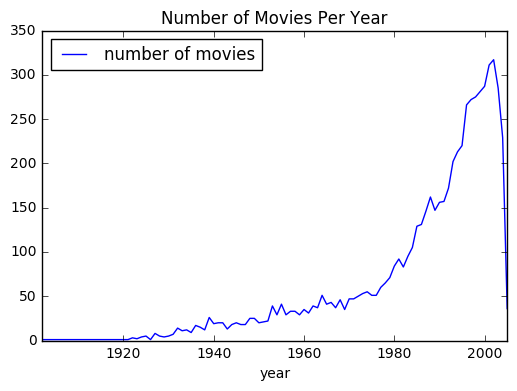

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

#create line chart of major movies per year
mm_year_df.plot(x='year', y='number of movies')
plt.title("Number of Movies Per Year")


### Task 2.10: Yearly average

Compute the average rating per year for all major movies.  
Use the numbers you computed to plot a line chart. Plot the year on the x-axis and the average rating on th y axis.  

        rating
year          
1902  8.200000
1903  7.400000
1915  7.100000
1916  7.800000
1917  7.900000
1919  7.400000
1920  8.100000
1921  8.200000
1922  7.933333
1923  8.050000
1924  8.050000
1925  8.000000
1926  8.400000
1927  7.750000
1928  8.020000
1929  7.400000
1930  7.520000
1931  7.871429
1932  7.557143
1933  7.654545
1934  7.541667
1935  7.777778
1936  7.329412
1937  7.626667
1938  7.733333
1939  7.569231
1940  7.721053
1941  7.510000
1942  7.635000
1943  7.523077
...        ...
1976  6.554902
1977  6.480000
1978  6.275385
1979  6.587324
1980  6.228571
1981  6.252174
1982  6.378313
1983  6.177895
1984  6.096190
1985  6.010853
1986  5.940458
1987  6.012329
1988  5.981481
1989  5.981633
1990  5.904487
1991  6.085350
1992  6.141279
1993  6.009901
1994  5.928638
1995  6.123182
1996  6.022932
1997  6.036765
1998  6.172727
1999  6.266904
2000  6.266899
2001  6.303859
2002  6.321136
2003  6.347719
2004  6.303493
2005  5.458333

[92 rows x 1 columns]


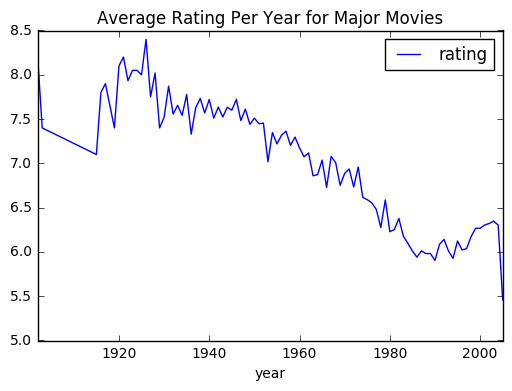

In [15]:
#average rating per year of major movies
mm_year_rating = major_movies[['year', 'rating']]
mmyr_avg = mm_year_rating.groupby('year').mean()

#print and plot data
print(mmyr_avg)
mmyr_avg.plot()
plt.title("Average Rating Per Year for Major Movies")


### Task 2.11: Explore and Interpret

Are old movies better? How could you explain this? Are there differences between the rating of major movies and all movies over time? Continue to explore and use plots to inform your answer. Interesting measures to consider are the total number of votes per year, the average number of votes for a movie in a particular year, etc. 

Correlation between votes and ratings per year 
            votes    rating
votes   1.000000 -0.656922
rating -0.656922  1.000000


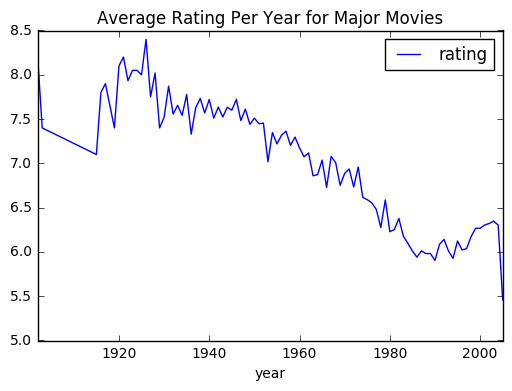

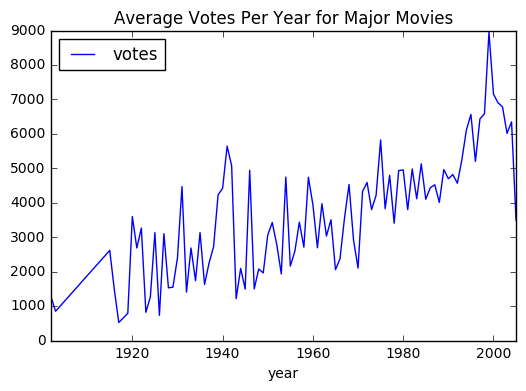

In [16]:
#Task 2.11 (a): Are older movies better?

#avg votes per year
mm_year_votes = major_movies[['year', 'votes']]
mmyv_avg = mm_year_votes.groupby('year').mean()

#view df
#print(mmyv_avg)

#plot data
mmyr_avg.plot()
plt.title("Average Rating Per Year for Major Movies")
mmyv_avg.plot()
plt.title("Average Votes Per Year for Major Movies")

#are the number of votes correlated with higher ratings?

#combine avg rating and avg votes per year
ratevote_list = [mmyv_avg, mmyr_avg]
rating_votes_avg = pd.concat(ratevote_list, axis=1)
#print(rating_votes_avg)
#calc corr
print("Correlation between votes and ratings per year \n", rating_votes_avg.corr())


**Interpretation 2.11 (a):** There is a moderate-to-strong negative correlation between the average number of votes per year and the average rating per year among major movies. This implies that as one variable increases, the other decreases. From the plot above ("Averge Votes Per Year for Major Movies"), we see that the average number of votes has steadily increased since 1902, which lends some understanding as to why the average ratings have steadily decreased since 1902 (see plot "Average Rating Per Year for Major Movies"). One interpretations could be that older movies were not necessarily better, but they were simply rated higher becuase they received fewer votes. 

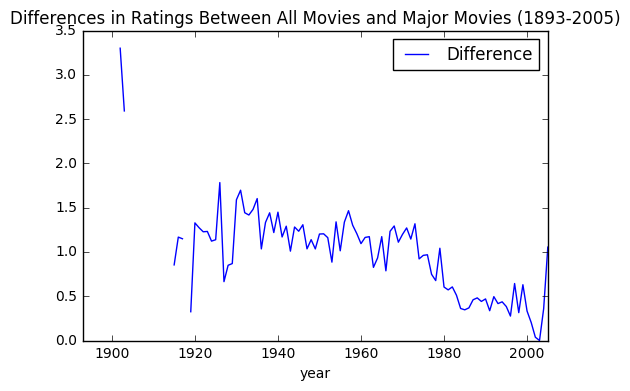

In [17]:
#Task 2.11 (b): Are there differences between major movie ratings and all movies over time?
#we'll work with averages again to make things simple

#average rating per year of all movies
all_yr_rt = movies_df[['year', 'rating']]
allyr_avg = all_yr_rt.groupby('year').mean()

#reindex both dfs
allyr_avg = allyr_avg.rename(columns={"rating": "Rating (All)"})
mmyr_avg = mmyr_avg.rename(columns={"rating": "Rating (MM)"})

#combine major movie ratings and all movie ratings, keep all values and rows
allyr_list = [allyr_avg, mmyr_avg]
allyr_rt = pd.concat(allyr_list, axis=1)
#allyr_rt.head(20)

#calc differences between yearly avg ratings of major movies and all movies
allyr_rt["Difference"] = abs(allyr_rt["Rating (All)"] - allyr_rt["Rating (MM)"])

#plot the differences
allyr_rt.plot(y='Difference')
plt.title("Differences in Ratings Between All Movies and Major Movies (1893-2005)")



**Interpretation 2.11 (b):** From the above plot ("Differences in Ratings Between All Movies and Major Movies (1893-2005)") we see that the difference in ratings between all movies and major movies has: i) typically been between 1 and 2 rating-points, and  ii) has steadily been decreasing over time. Coupled with our analysis from 2.11 (a), we can start to identify relationships among these various parameters. Coupled with our plots in 2.11 (a), perhaps we can infer that because the difference in average ratings between the two (all movies and major movies) has decreased over the years, that movies in general are receiving lower ratings each successive year (do critics become harsher as years pass or are we just seeing a shift towards the true population mean as the number of votes increase each year?). 

We could perform a hypothesis test (at significance level .1 or .05) to determine whether the differences in means are significant. 